# Logistic map

In [1]:
%load_ext cython
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
def logistic_trajectory(x0, r, steps=20):
    x = np.empty(steps)
    x[0] = x0
    for i in range(1, steps):
        x[i] = x[i - 1]*r*(1.0 - x[i - 1])
    return x

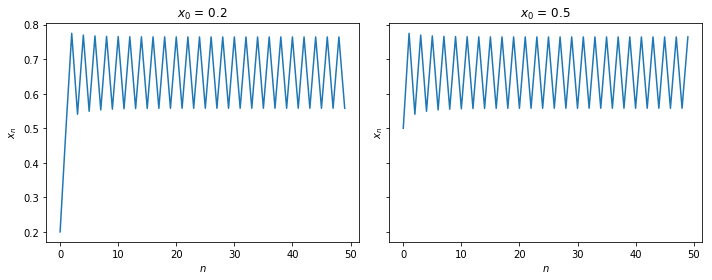

In [5]:
steps = 50
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)
axes[0].plot(logistic_trajectory(0.2, 3.1, steps))
axes[0].set_title(r'$x_0$ = 0.2')
axes[0].set_xlabel(r'$n$')
axes[0].set_ylabel(r'$x_n$')
axes[1].plot(logistic_trajectory(0.5, 3.1, steps))
axes[1].set_title(r'$x_0$ = 0.5')
axes[1].set_xlabel(r'$n$')
axes[1].set_ylabel(r'$x_n$')
plt.tight_layout()

In [6]:
def convergence(x0, r, delta=1.0e-7):
    n = 0
    x_prev = x0
    def two_steps(x, r):
        x = x*r*(1.0 - x)
        return x*r*(1.0 - x)
    x = two_steps(x_prev, r)
    while (np.abs(x - x_prev)/x > delta):
        n += 2
        x_prev = x
        x = two_steps(x_prev, r)
    return n

In [8]:
converge_vec = np.vectorize(convergence)

In [9]:
def compute_convergence(x, r, delta=1.0e-7):
    X, R = np.meshgrid(x, r)
    return converge_vec(X, R, delta)

In [10]:
x = np.linspace(0.01, 0.99, 10)
r = np.linspace(2.8, 4.0, 50)

In [11]:
compute_convergence(x, r)

KeyboardInterrupt: 

In [12]:
def logistic_function(x0, r, steps=1000):
    x = x0
    for _ in range(steps):
        x = r*x*(1.0 - x)
    return x

In [13]:
def compute_map(x, r, steps=1000):
    X, R = np.meshgrid(x, r)
    return logistic_function(X, R, steps)

In [14]:
x = np.linspace(0.01, 0.99, 500)
r = np.linspace(2.8, 4.0, 1000)

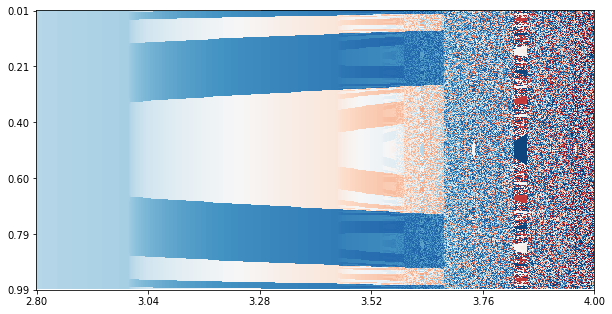

In [15]:
_ = plt.figure(figsize=(10, 20))
_ = plt.imshow(np.transpose(compute_map(x, r, 1000)), cmap=plt.cm.RdBu)
_ = plt.xticks(np.linspace(0, len(r) + 1, 6), map(lambda x: f'{x:.2f}', np.linspace(r.min(), r.max(), 6)))
_ = plt.yticks(np.linspace(0, len(x) + 1, 6), map(lambda x: f'{x:.2f}', np.linspace(x.min(), x.max(), 6)))

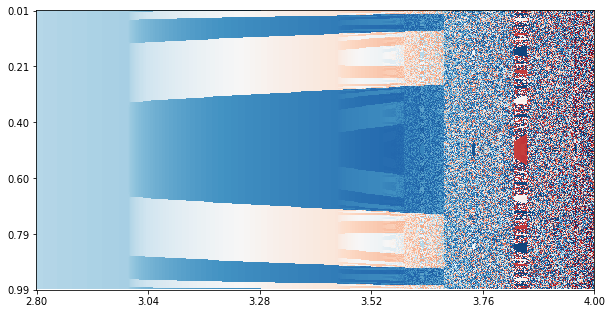

In [16]:
_ = plt.figure(figsize=(10, 20))
_ = plt.imshow(np.transpose(compute_map(x, r, 1001)), cmap=plt.cm.RdBu)
_ = plt.xticks(np.linspace(0, len(r) + 1, 6), map(lambda x: f'{x:.2f}', np.linspace(r.min(), r.max(), 6)))
_ = plt.yticks(np.linspace(0, len(x) + 1, 6), map(lambda x: f'{x:.2f}', np.linspace(x.min(), x.max(), 6)))

In [2]:
%%cython
cdef c_logistic_function(double[:, ::] x0, double[:, ::] r, int steps=1000):
    x = x0
    for _ in range(steps):
        x = r*x*(1.0 - x)
    return x

In [18]:
def compute_map(x, r, steps=1000):
    X, R = np.meshgrid(x, r)
    return logistic_function(X, R, steps)